<a href="https://colab.research.google.com/github/MarcoATL/MachineLearning/blob/main/Practica3_Reconocimiento_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de imagenes utilizando SVM

### Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from scipy.stats import sem
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces() 
faces.DESCR

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
print(faces.target.shape)

(400,)


In [ ]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
print(faces.images.shape)

(400, 64, 64)


In [ ]:
print(faces.data.shape)

(400, 4096)


In [ ]:
def print_faces(images, target,top_n):
    fig = plt.figure(figsize = (12,12)) # configurar el tamaño de la figura en pulgadas
    fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=0.05,wspace=0.05) #cuanto queremos de Espacios en blanco entre las imagenes
    #Plotea el numero de imagenes que el usuario pida
    for i in range(top_n): 
        #Visualizar imagenes en matriz de 20x20
        p = fig.add_subplot(15,15,i+1,xticks=[], yticks=[]) #Tamaño de la imagenes
        p.imshow(images[i],cmap=plt.cm.bone)
        
        #Incluir etiqueta objetivo en la imagen
        p.text(1,18,str(target[i]),color='blue')  #Agregue el texto 
        p.text(1,60,str(i),color='red')

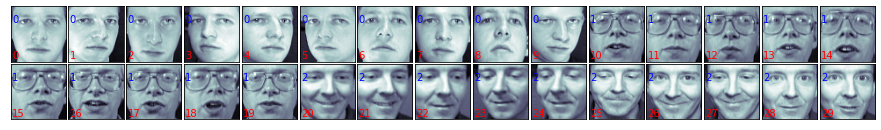

In [ ]:
print_faces(faces.images, faces.target, 30)

In [ ]:
faces.data.max()

1.0

In [ ]:
faces.data.min()

0.0

### Análisis de las clases 

In [ ]:
(unique, counts) = np.unique(faces.target, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[ 0 10]
 [ 1 10]
 [ 2 10]
 [ 3 10]
 [ 4 10]
 [ 5 10]
 [ 6 10]
 [ 7 10]
 [ 8 10]
 [ 9 10]
 [10 10]
 [11 10]
 [12 10]
 [13 10]
 [14 10]
 [15 10]
 [16 10]
 [17 10]
 [18 10]
 [19 10]
 [20 10]
 [21 10]
 [22 10]
 [23 10]
 [24 10]
 [25 10]
 [26 10]
 [27 10]
 [28 10]
 [29 10]
 [30 10]
 [31 10]
 [32 10]
 [33 10]
 [34 10]
 [35 10]
 [36 10]
 [37 10]
 [38 10]
 [39 10]]


### Separación del dataset en un conjunto de entrenamiento y de prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
cv_results = cross_validate(svc, X_train, y_train, cv=10,return_train_score=False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
cv_results['test_score']

array([1.     , 1.     , 0.9375 , 0.9375 , 0.9375 , 0.90625, 0.96875,
       1.     , 1.     , 0.9375 ])

In [ ]:
print(np.mean(cv_results['test_score']))

0.9625


In [ ]:
y_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Precisión en el conjunto de prueba: {}'.format(test_accuracy))

Precisión en el conjunto de prueba: 0.9875


### Matriz de confusión

In [ ]:
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))

Predicted  0  1  2  3  4  5  6  7  9  10  ...  30  31  32  33  34  35  36  37  \
True                                      ...                                   
0          5  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
1          0  4  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
2          0  0  2  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
3          0  0  0  1  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
4          0  0  0  0  1  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
5          0  0  0  0  0  3  0  0  0   0  ...   0   0   0   0   0   0   0   0   
6          0  0  0  0  0  0  3  0  0   0  ...   0   0   0   0   0   0   0   0   
7          1  0  0  0  0  0  0  2  0   0  ...   0   0   0   0   0   0   0   0   
9          0  0  0  0  0  0  0  0  1   0  ...   0   0   0   0   0   0   0   0   
10         0  0  0  0  0  0  0  0  0   3  ...   0   0   0   0   0   0   0   0   
11         0  0  0  0  0  0 

### Reporte de clasificación

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         3
          20       1.00    

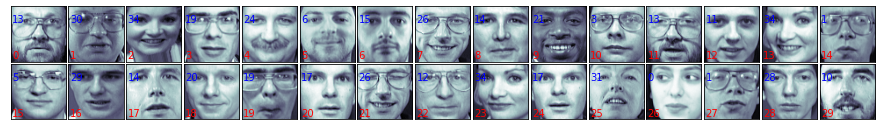

In [ ]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]  #reshape the data from arrays to 64 x 64 matrices:
print_faces(eval_faces,y_pred,30)

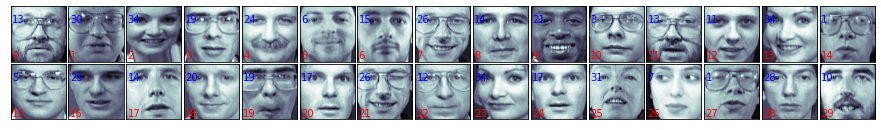

In [ ]:
print_faces(eval_faces,y_test,30)